## Model Evaluation

#### Import Libraries

In [185]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

### 1. Model Evaluation of different preprocessed dataset

In [186]:
evaluation_results = []

In [187]:
# List all CSV files in the data folder
csv_files = [f for f in os.listdir("../data") if f.endswith('.csv')]
csv_files

['boston_housing.csv',
 'data_corskew.csv',
 'data_heavyskew.csv',
 'data_Nooutlierstarget.csv',
 'data_normalized.csv',
 'data_normalizedcorskew.csv',
 'data_normalizedheavyskew.csv']

In [188]:
# iterate over each csv files
for file in csv_files:
    # load dataset from the files
    df = pd.read_csv(f"../data/{file}")

    # Define features and target for regression
    X = df.drop("medv", axis=1)
    y = df["medv"]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = reg_model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Calculating Adjusted R-squared
    r2 = r2_score(y_test, y_pred)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

    mae = mean_absolute_error(y_test, y_pred)
    cv_score = cross_val_score(estimator = reg_model, X = X_train, y = y_train, cv = 10).mean()

    evaluation_results.append({
        "Model": f"{file}",
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "r2": r2,
        "adjusted_r2": adjusted_r2,
        "cv_score": cv_score
    })

In [189]:
df_evaluation = pd.DataFrame(evaluation_results)

In [190]:
df_evaluation.round(3)

,Model,MSE,RMSE,MAE,r2,adjusted_r2,cv_score
0,boston_housing.csv,24.291,4.929,3.189,0.669,0.620,0.699
1,data_corskew.csv,0.000,0.000,0.000,1.000,1.000,1.000
2,data_heavyskew.csv,0.030,0.173,0.131,0.914,0.901,0.908
3,data_Nooutlierstarget.csv,9.929,3.151,2.231,0.752,0.712,0.733
4,data_normalized.csv,0.012,0.110,0.071,0.669,0.620,0.699
5,data_normalizedcorskew.csv,0.000,0.000,0.000,1.000,1.000,1.000
6,data_normalizedheavyskew.csv,0.003,0.056,0.043,0.914,0.901,0.908


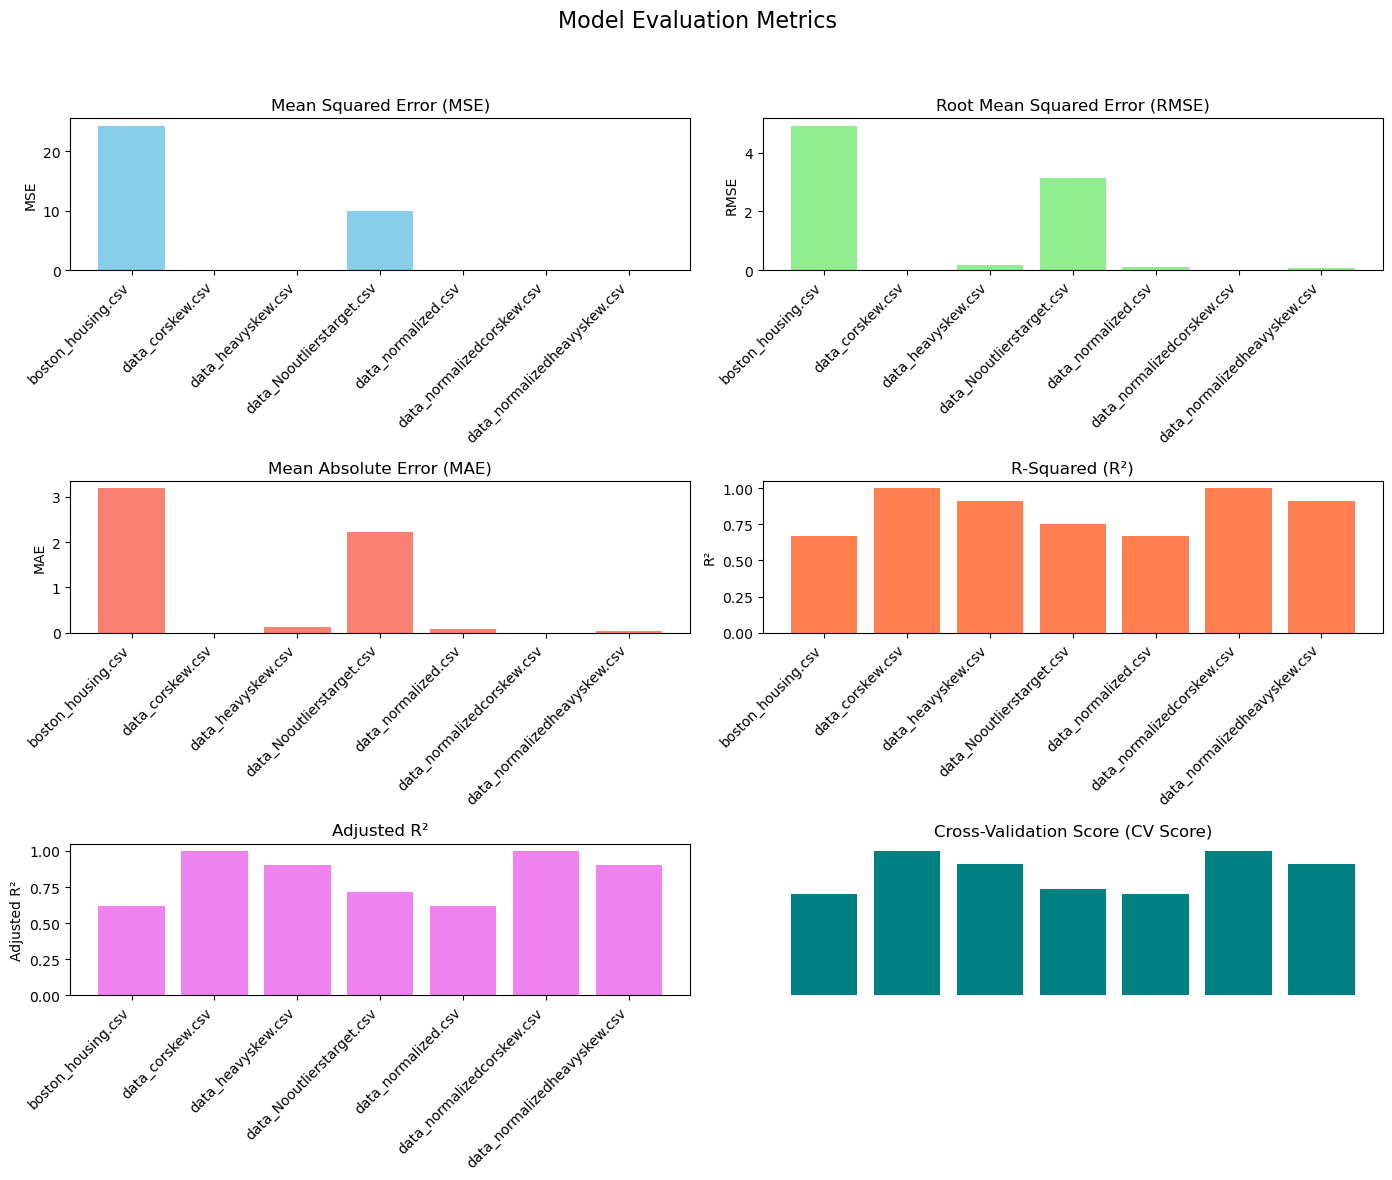

In [191]:
# Plotting the metrics
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Model Evaluation Metrics", fontsize=16)

# Plot for MSE
axes[0, 0].bar(df_evaluation["Model"], df_evaluation["MSE"], color="skyblue")
axes[0, 0].set_title("Mean Squared Error (MSE)")
axes[0, 0].set_xticks(range(len(df_evaluation["Model"])))
axes[0, 0].set_xticklabels(df_evaluation["Model"], rotation=45, ha="right")
axes[0, 0].set_ylabel("MSE")

# Plot for RMSE
axes[0, 1].bar(df_evaluation["Model"],
               df_evaluation["RMSE"], color="lightgreen")
axes[0, 1].set_title("Root Mean Squared Error (RMSE)")
axes[0, 1].set_xticks(range(len(df_evaluation["Model"])))
axes[0, 1].set_xticklabels(df_evaluation["Model"], rotation=45, ha="right")
axes[0, 1].set_ylabel("RMSE")

# Plot for MAE
axes[1, 0].bar(df_evaluation["Model"], df_evaluation["MAE"], color="salmon")
axes[1, 0].set_title("Mean Absolute Error (MAE)")
axes[1, 0].set_xticks(range(len(df_evaluation["Model"])))
axes[1, 0].set_xticklabels(df_evaluation["Model"], rotation=45, ha="right")
axes[1, 0].set_ylabel("MAE")

# Plot for R2
axes[1, 1].bar(df_evaluation["Model"], df_evaluation["r2"], color="coral")
axes[1, 1].set_title("R-Squared (R²)")
axes[1, 1].set_xticks(range(len(df_evaluation["Model"])))
axes[1, 1].set_xticklabels(df_evaluation["Model"], rotation=45, ha="right")
axes[1, 1].set_ylabel("R²")

# Plot for Adjusted R2
axes[2, 0].bar(df_evaluation["Model"],
               df_evaluation["adjusted_r2"], color="violet")
axes[2, 0].set_title("Adjusted R²")
axes[2, 0].set_xticks(range(len(df_evaluation["Model"])))
axes[2, 0].set_xticklabels(df_evaluation["Model"], rotation=45, ha="right")
axes[2, 0].set_ylabel("Adjusted R²")

# Plot for CV Score
axes[2, 1].bar(df_evaluation["Model"], df_evaluation["cv_score"], color="teal")
axes[2, 1].set_title("Cross-Validation Score (CV Score)")
axes[2, 1].set_xticks(range(len(df_evaluation["Model"])))
axes[2, 1].set_xticklabels(df_evaluation["Model"], rotation=45, ha="right")
axes[2, 1].set_ylabel("CV Score")

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Interpretation of model evaluation metrics:

### 1. **boston_housing.csv**
- **MSE**: 24.291 - The model has a relatively high error when predicting this dataset.
- **RMSE**: 4.929 - On average, the model's predictions deviate from the actual values by about 4.93 units.
- **MAE**: 3.189 - The average absolute error of the model's predictions is about 3.19 units.
- **R²**: 0.669 - The model explains about 67% of the variance in the target variable.
- **Adjusted R²**: 0.620 - Adjusted for the number of predictors, it still explains 62% of the variance.
- **CV Score**: 0.699 - Cross-validation indicates the model performs reasonably well on different subsets of the data.

### 2. **data_corskew.csv**
- **MSE**: 0.000 - The model has negligible error on this dataset.
- **RMSE**: 0.000 - No deviation between predicted and actual values; perfect fit.
- **MAE**: 0.000 - No absolute error; perfect predictions.
- **R²**: 1.000 - The model perfectly explains the variance in the target variable.
- **Adjusted R²**: 1.000 - Perfectly adjusted for the number of predictors.
- **CV Score**: 1.000 - Model performs perfectly across different subsets of the data.

### 3. **data_heavyskew.csv**
- **MSE**: 0.030 - The model has a low error but not as perfect as `data_corskew.csv`.
- **RMSE**: 0.173 - Predictions deviate from actual values by about 0.17 units on average.
- **MAE**: 0.131 - Average absolute error is about 0.13 units.
- **R²**: 0.914 - The model explains about 91% of the variance in the target variable.
- **Adjusted R²**: 0.901 - After adjusting for the number of predictors, the model explains 90% of the variance.
- **CV Score**: 0.908 - Model performs very well across different subsets of the data.

### 4. **data_Nooutlierstarget.csv**
- **MSE**: 9.929 - The model has a higher error, indicating less accuracy.
- **RMSE**: 3.151 - Predictions deviate from actual values by about 3.15 units on average.
- **MAE**: 2.231 - Average absolute error is about 2.23 units.
- **R²**: 0.752 - The model explains about 75% of the variance in the target variable.
- **Adjusted R²**: 0.712 - After adjusting for predictors, the model explains 71% of the variance.
- **CV Score**: 0.733 - The model performs reasonably well across different subsets of the data.

### 5. **data_normalized.csv**
- **MSE**: 0.012 - The model has low error.
- **RMSE**: 0.110 - Predictions deviate from actual values by about 0.11 units on average.
- **MAE**: 0.071 - Average absolute error is about 0.07 units.
- **R²**: 0.669 - The model explains about 67% of the variance in the target variable.
- **Adjusted R²**: 0.620 - Adjusted for the number of predictors, the model explains 62% of the variance.
- **CV Score**: 0.699 - Model performs reasonably well on different subsets of the data.

### 6. **data_normalizedcorskew.csv**
- **MSE**: 0.000 - Perfect predictions with negligible error.
- **RMSE**: 0.000 - No deviation between predicted and actual values.
- **MAE**: 0.000 - No absolute error; perfect predictions.
- **R²**: 1.000 - Perfectly explains the variance in the target variable.
- **Adjusted R²**: 1.000 - Perfectly adjusted for the number of predictors.
- **CV Score**: 1.000 - Model performs perfectly across different subsets of the data.

### 7. **data_normalizedheavyskew.csv**
- **MSE**: 0.003 - The model has very low error.
- **RMSE**: 0.056 - Predictions deviate from actual values by about 0.06 units on average.
- **MAE**: 0.043 - Average absolute error is about 0.04 units.
- **R²**: 0.914 - The model explains about 91% of the variance in the target variable.
- **Adjusted R²**: 0.901 - After adjusting for the number of predictors, the model explains 90% of the variance.
- **CV Score**: 0.908 - Model performs very well on different subsets of the data.

### Summary
- **Best Performing Models**: `data_corskew.csv`, `data_normalizedcorskew.csv` have perfect or near-perfect scores across all metrics.
- **High Accuracy**: `data_heavyskew.csv` and `data_normalizedheavyskew.csv` also perform very well.
- **Less Accurate Models**: `boston_housing.csv` and `data_Nooutlierstarget.csv` show higher errors and lower scores, indicating room for improvement.